In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

In [2]:
# Reading CSV file
df=pd.read_csv("churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Changing the column names 
df.rename(columns={'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'},inplace=True)

In [5]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking For Duplicates
df.duplicated().sum()

0

In [8]:
# Checking for null values present in "TotalCharges" variable
df.query("TotalCharges== ' ' ").index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [9]:
#Drop of null values present in the TotalCharges feature
df.drop(index=[488,753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],axis=0,inplace=True)

In [10]:
# Converting of dty
df['TotalCharges']=df["TotalCharges"].astype('float')

In [11]:
# Resetting of index
df.reset_index(inplace=True)

In [12]:
# dropping of index
df.drop("index",axis=1,inplace=True)
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Univariate Analysis

`Analysis on "SeniorCitizen" feature - Numerical`

In [13]:
print("Min:",df["SeniorCitizen"].min())
print("Max:",df["SeniorCitizen"].max())
print("Mean:",df["SeniorCitizen"].mean())
print("Median:",df["SeniorCitizen"].median())
print("Std:",df["SeniorCitizen"].std())

Min: 0
Max: 1
Mean: 0.16240045506257111
Median: 0.0
Std: 0.3688439967571208


<AxesSubplot:>

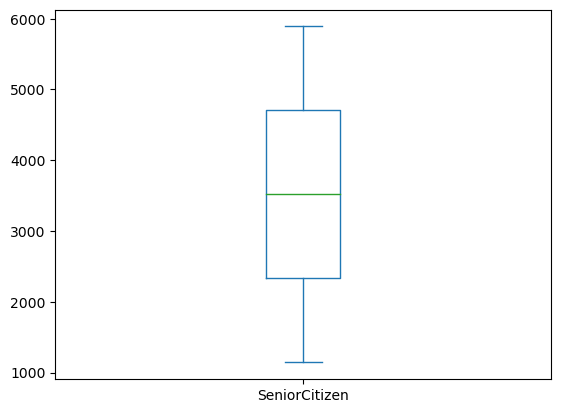

In [14]:
df["SeniorCitizen"].value_counts().plot(kind="box")

In [15]:
#By observing above boxplot we can see there are no outliers

<AxesSubplot:ylabel='Density'>

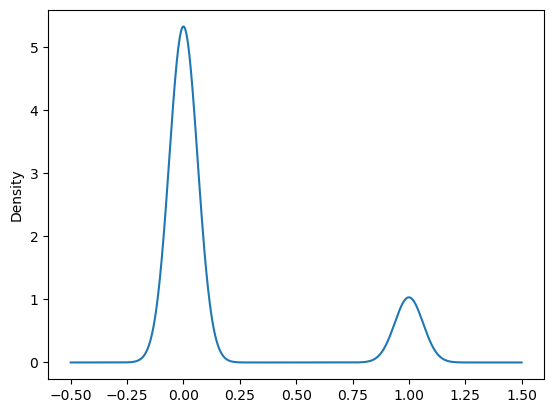

In [16]:
df["SeniorCitizen"].plot(kind="kde")

In [17]:
#By observing above kdeplot we can observe that the curve is not Normally distribute

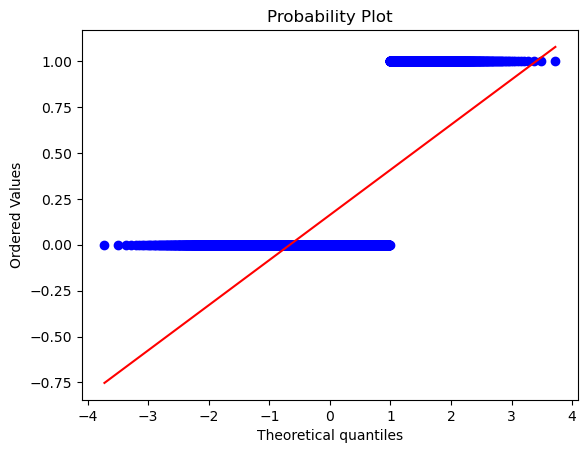

In [18]:
stats.probplot(df["SeniorCitizen"],dist='norm',plot=plt)
plt.show()

In [19]:
#By observing above QQplot we observe that it is not uniforly distributed so that we cannot apply boxcox Transformation

`Analysis on "Tenure" feature - Numerical`

In [20]:
print("Min:",df["Tenure"].min())
print("Max:",df["Tenure"].max())
print("Mean:",df["Tenure"].mean())
print("Median:",df["Tenure"].median())
print("Std:",df["Tenure"].std())

Min: 1
Max: 72
Mean: 32.421786120591584
Median: 29.0
Std: 24.545259709263192


<AxesSubplot:>

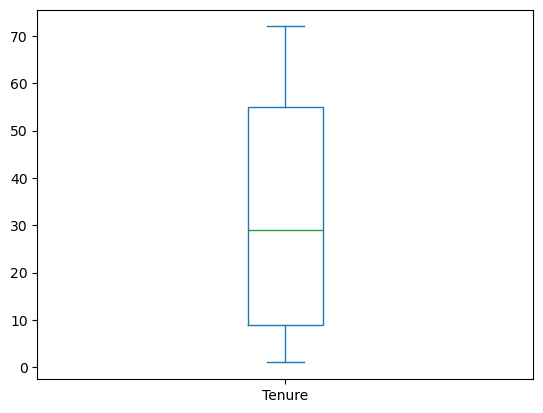

In [21]:
df["Tenure"].plot(kind="box")

In [22]:
# As we seen the above box plot that there are no outliers are detected. 

<AxesSubplot:ylabel='Density'>

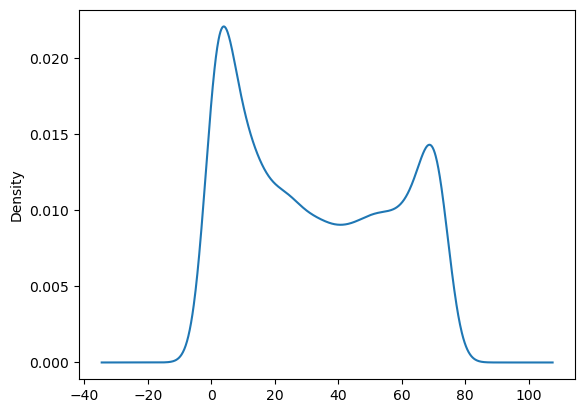

In [23]:
df["Tenure"].plot(kind="kde")

In [24]:
#By observing above kdeplot we can observe that the curve is not Normally distribute

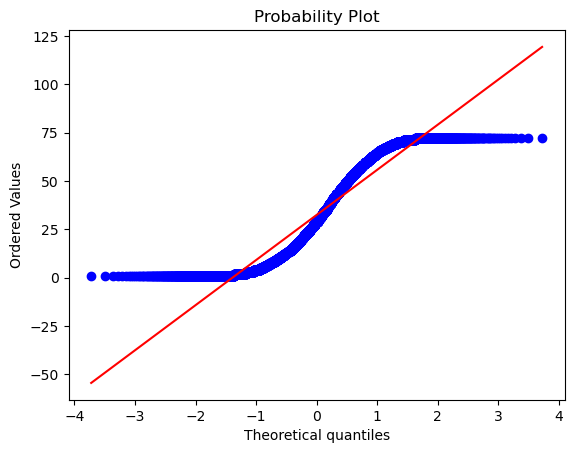

In [25]:
stats.probplot(df["Tenure"],dist='norm',plot=plt)
plt.show()

In [26]:
#By observing above QQplot we observe that it is not uniforly distributed so that we cannot apply boxcox Transformation

`Analysis on "MonthlyCharges" feature - Numerical`

In [27]:
print("Min:",df["MonthlyCharges"].min())
print("Max:",df["MonthlyCharges"].max())
print("Mean:",df["MonthlyCharges"].mean())
print("Median:",df["MonthlyCharges"].median())
print("Std:",df["MonthlyCharges"].std())

Min: 18.25
Max: 118.75
Mean: 64.79820819112632
Median: 70.35
Std: 30.08597388404983


<AxesSubplot:>

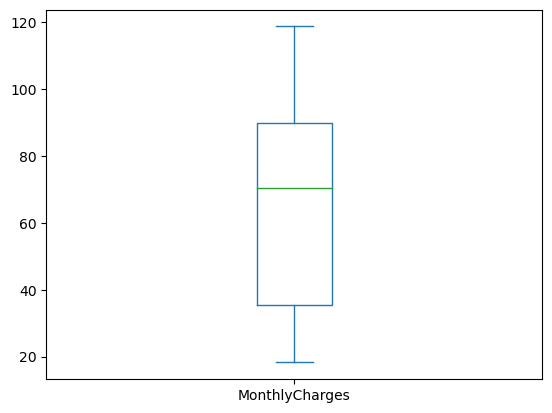

In [28]:
df["MonthlyCharges"].plot(kind="box")

In [29]:
# As we seen the above box plot that there are no outliers are detected. 

<AxesSubplot:ylabel='Density'>

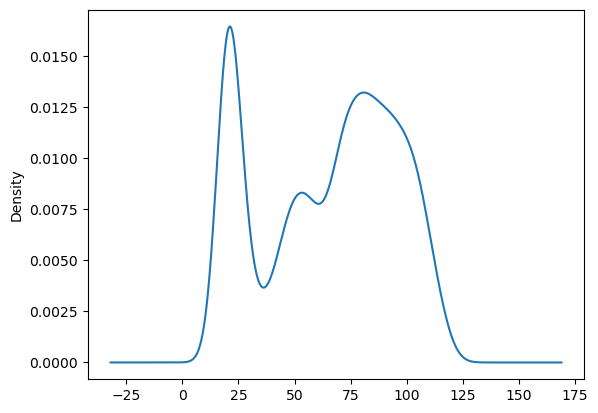

In [30]:
df["MonthlyCharges"].plot(kind="kde")

In [31]:
#By observing above kdeplot we can observe that the curve is not Normally distribute

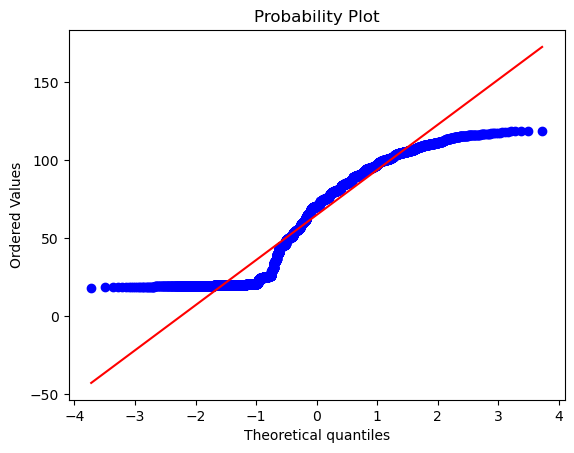

In [32]:
stats.probplot(df["MonthlyCharges"],dist='norm',plot=plt)
plt.show()

In [33]:
#By observing above QQplot we observe that it is not uniforly distributed so that we cannot apply boxcox Transformation

`Analysis on "TotalCharges" feature - Numerical`

In [34]:
print("Min:",df["TotalCharges"].min())
print("Max:",df["TotalCharges"].max())
print("Mean:",df["TotalCharges"].mean())
print("Median:",df["TotalCharges"].median())
print("Std:",df["TotalCharges"].std())

Min: 18.8
Max: 8684.8
Mean: 2283.3004408418697
Median: 1397.475
Std: 2266.7713618831453


<AxesSubplot:>

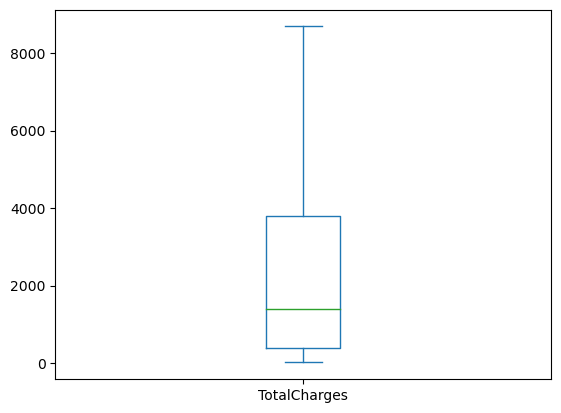

In [35]:
df["TotalCharges"].plot(kind="box")

In [36]:
# As we seen the above box plot that there may not be there outliers in the feature. 

<AxesSubplot:ylabel='Density'>

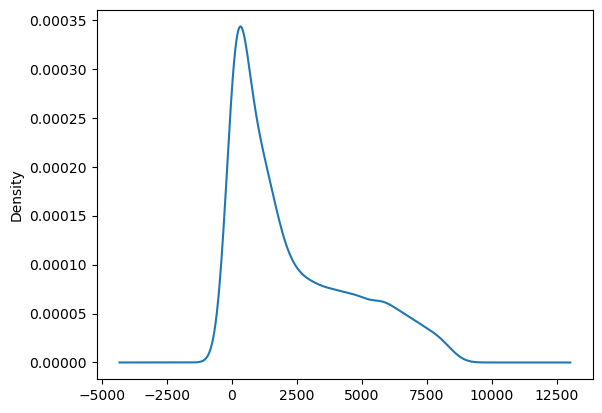

In [37]:
df["TotalCharges"].plot(kind="kde")

In [38]:
#By observing above kdeplot we can observe that the curve is not Normally distribute

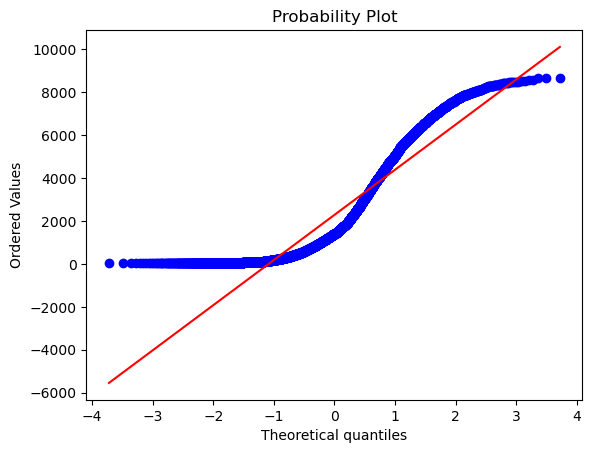

In [39]:
stats.probplot(df["TotalCharges"],dist='norm',plot=plt)
plt.show()

In [40]:
#By observing above QQplot we observe that it is not uniforly distributed so that we cannot apply boxcox Transformation

In [41]:
def uni_variate(df,column):
    if df[column].dtype in ["O"]:
        print("Feature =",column)
        print("mode:",df[column].mode())
        print("------------------------------------------------")
        print("Value_counts:\n",df[column].value_counts())
        print(df[column].value_counts().plot(kind = 'bar'),plt.show())

`Analysis on "Gender" feature - Categorical`

Feature = Gender
mode: 0    Male
Name: Gender, dtype: object
------------------------------------------------
Value_counts:
 Male      3549
Female    3483
Name: Gender, dtype: int64


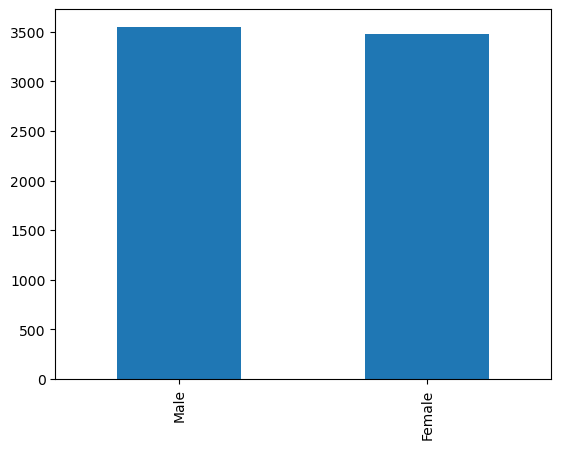

AxesSubplot(0.125,0.11;0.775x0.77) None


In [42]:
uni_variate(df,"Gender")

`Analysis on "Partner" feature - Categorical`

Feature = Partner
mode: 0    No
Name: Partner, dtype: object
------------------------------------------------
Value_counts:
 No     3639
Yes    3393
Name: Partner, dtype: int64


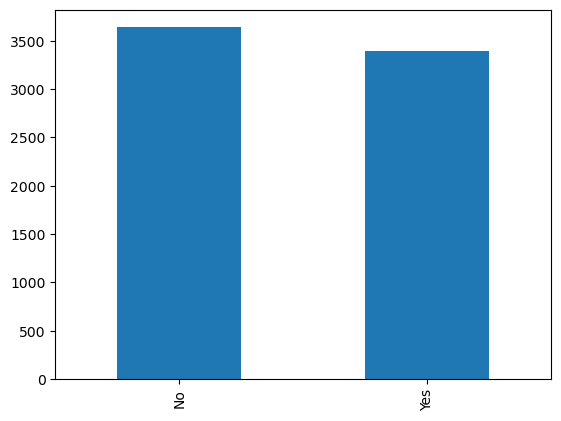

AxesSubplot(0.125,0.11;0.775x0.77) None


In [43]:
uni_variate(df,"Partner")

`Analysis on "Dependents" feature - Categorical`

Feature = Dependents
mode: 0    No
Name: Dependents, dtype: object
------------------------------------------------
Value_counts:
 No     4933
Yes    2099
Name: Dependents, dtype: int64


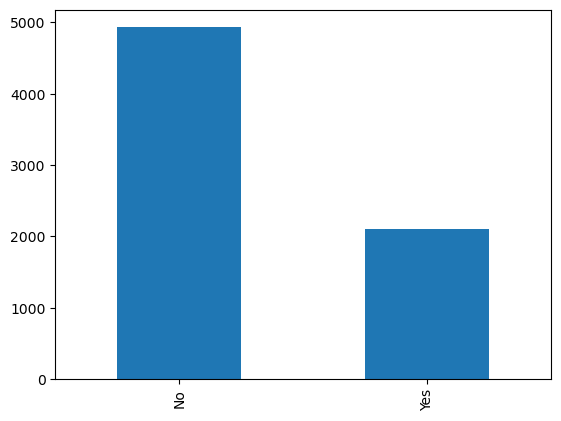

AxesSubplot(0.125,0.11;0.775x0.77) None


In [44]:
uni_variate(df,"Dependents")

`Analysis on "PhoneService" feature - Categorical`

Feature = PhoneService
mode: 0    Yes
Name: PhoneService, dtype: object
------------------------------------------------
Value_counts:
 Yes    6352
No      680
Name: PhoneService, dtype: int64


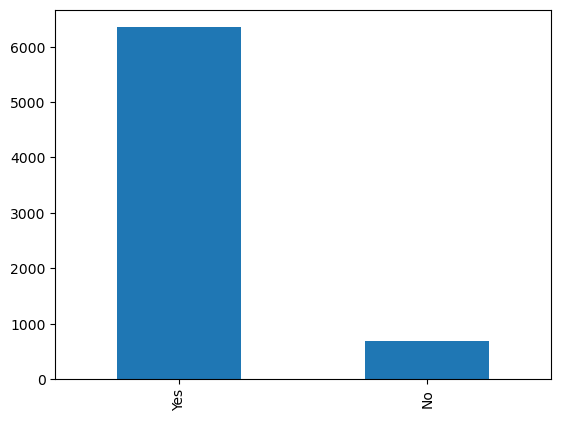

AxesSubplot(0.125,0.11;0.775x0.77) None


In [45]:
uni_variate(df,"PhoneService")

`Analysis on "MultipleLines" feature - Categorical`

Feature = MultipleLines
mode: 0    No
Name: MultipleLines, dtype: object
------------------------------------------------
Value_counts:
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


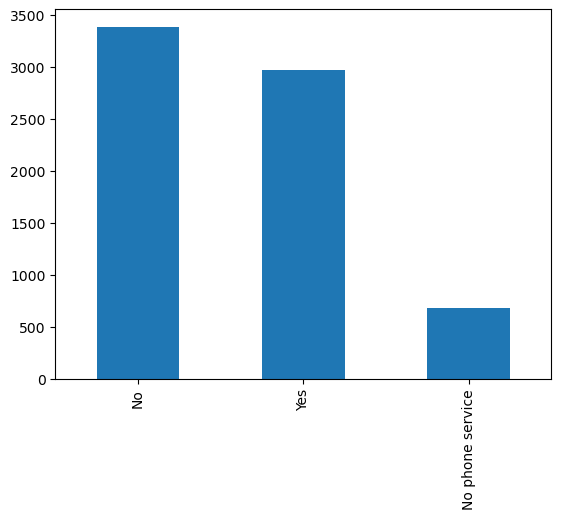

AxesSubplot(0.125,0.11;0.775x0.77) None


In [46]:
uni_variate(df,"MultipleLines")

`Analysis on "InternetService" feature - Categorical`

Feature = InternetService
mode: 0    Fiber optic
Name: InternetService, dtype: object
------------------------------------------------
Value_counts:
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


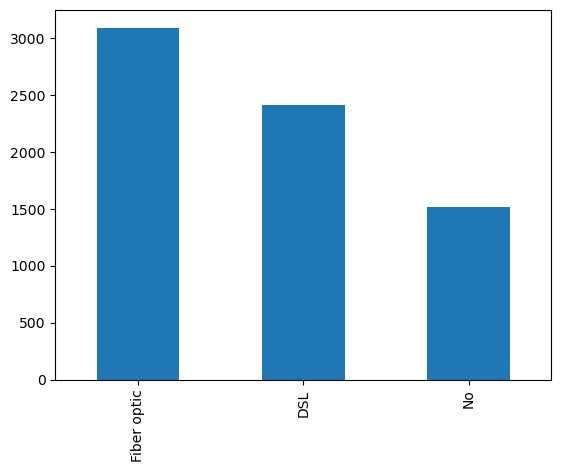

AxesSubplot(0.125,0.11;0.775x0.77) None


In [47]:
uni_variate(df,"InternetService")

`Analysis on "OnlineSecurity" feature - Categorical`

Feature = OnlineSecurity
mode: 0    No
Name: OnlineSecurity, dtype: object
------------------------------------------------
Value_counts:
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


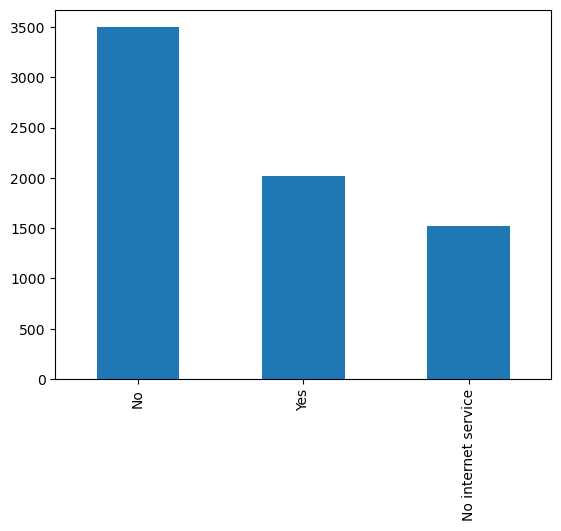

AxesSubplot(0.125,0.11;0.775x0.77) None


In [48]:
uni_variate(df,"OnlineSecurity")

`Analysis on "OnlineBackup" feature - Categorical`

Feature = OnlineBackup
mode: 0    No
Name: OnlineBackup, dtype: object
------------------------------------------------
Value_counts:
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


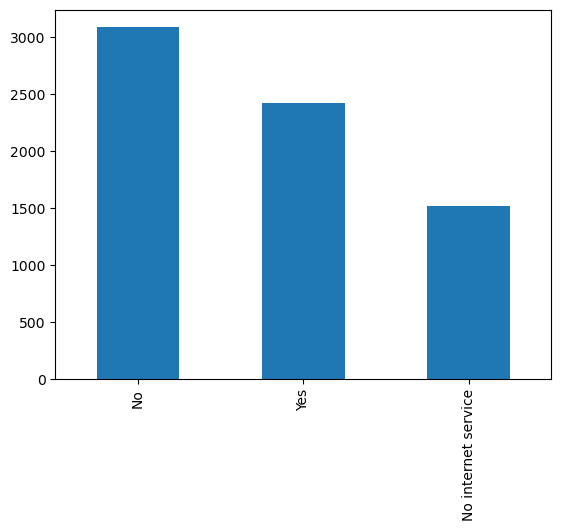

AxesSubplot(0.125,0.11;0.775x0.77) None


In [49]:
uni_variate(df,"OnlineBackup")

`Analysis on "DeviceProtection" feature - Categorical`

Feature = DeviceProtection
mode: 0    No
Name: DeviceProtection, dtype: object
------------------------------------------------
Value_counts:
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


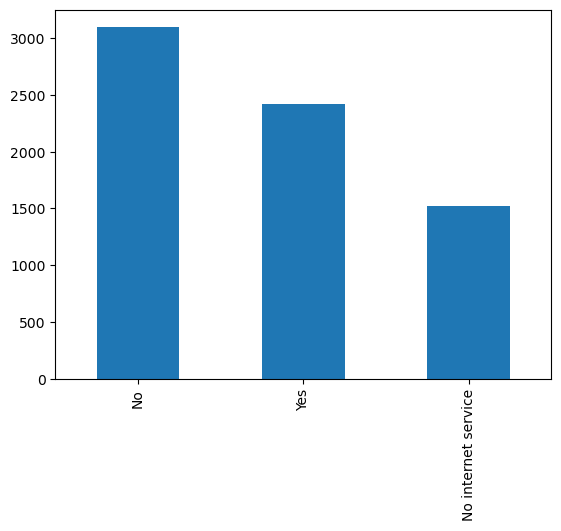

AxesSubplot(0.125,0.11;0.775x0.77) None


In [50]:
uni_variate(df,"DeviceProtection")

`Analysis on "TechSupport" feature - Categorical`

Feature = TechSupport
mode: 0    No
Name: TechSupport, dtype: object
------------------------------------------------
Value_counts:
 No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


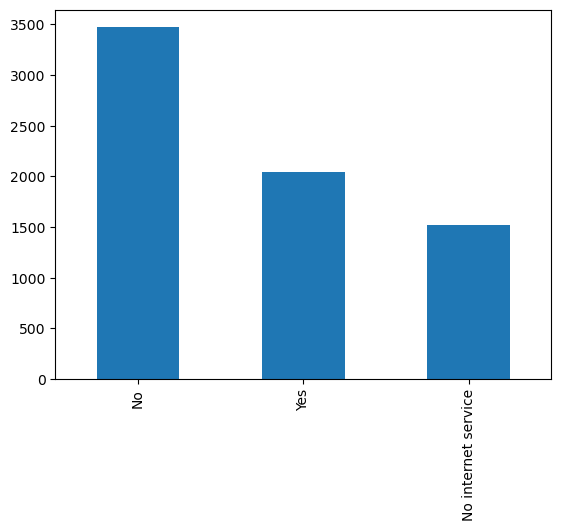

AxesSubplot(0.125,0.11;0.775x0.77) None


In [51]:
uni_variate(df,"TechSupport")

`Analysis on "StreamingTV" feature - Categorical`

Feature = StreamingTV
mode: 0    No
Name: StreamingTV, dtype: object
------------------------------------------------
Value_counts:
 No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


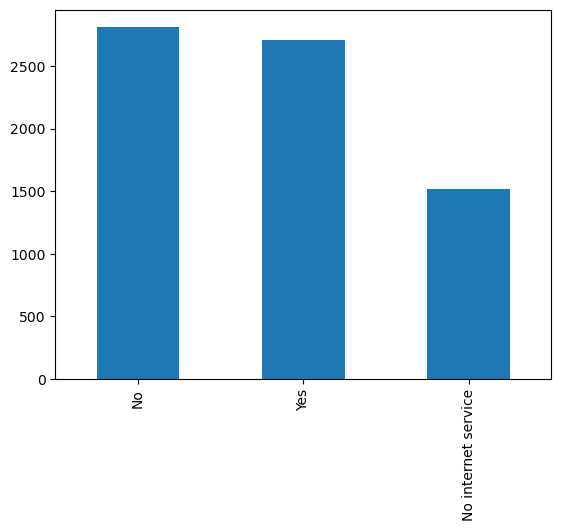

AxesSubplot(0.125,0.11;0.775x0.77) None


In [52]:
uni_variate(df,"StreamingTV")

`Analysis on "StreamingMovies" feature - Categorical`

Feature = StreamingMovies
mode: 0    No
Name: StreamingMovies, dtype: object
------------------------------------------------
Value_counts:
 No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


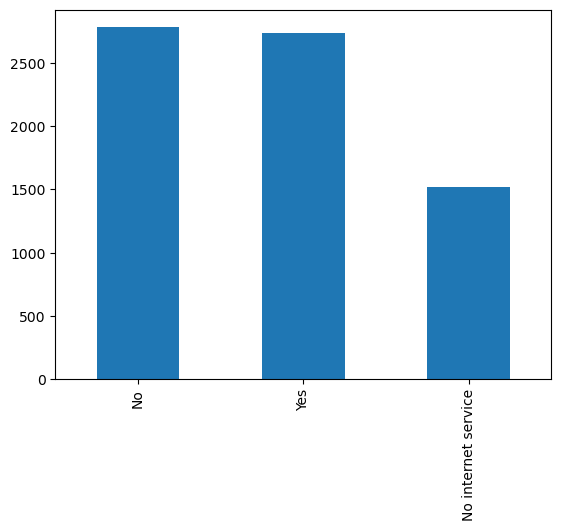

AxesSubplot(0.125,0.11;0.775x0.77) None


In [53]:
uni_variate(df,"StreamingMovies")

`Analysis on "Contract" feature - Categorical`

Feature = Contract
mode: 0    Month-to-month
Name: Contract, dtype: object
------------------------------------------------
Value_counts:
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


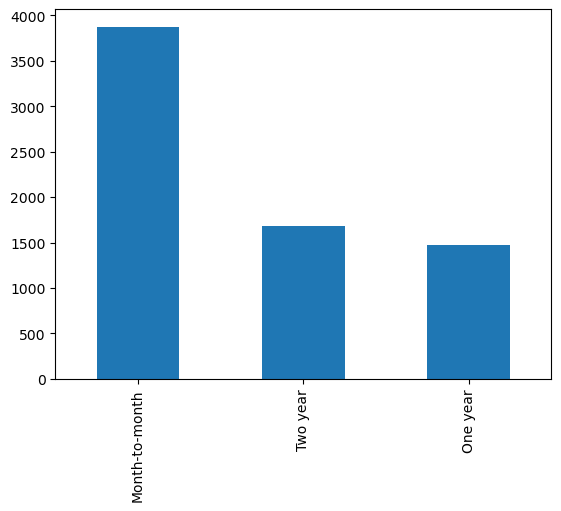

AxesSubplot(0.125,0.11;0.775x0.77) None


In [54]:
uni_variate(df,"Contract")

`Analysis on "PaperlessBilling" feature - Categorical`

Feature = PaperlessBilling
mode: 0    Yes
Name: PaperlessBilling, dtype: object
------------------------------------------------
Value_counts:
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


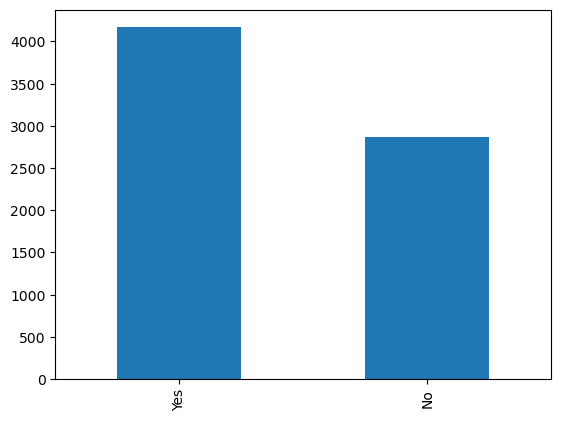

AxesSubplot(0.125,0.11;0.775x0.77) None


In [55]:
uni_variate(df,"PaperlessBilling")

`Analysis on "PaymentMethod" feature - Categorical`

Feature = PaymentMethod
mode: 0    Electronic check
Name: PaymentMethod, dtype: object
------------------------------------------------
Value_counts:
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


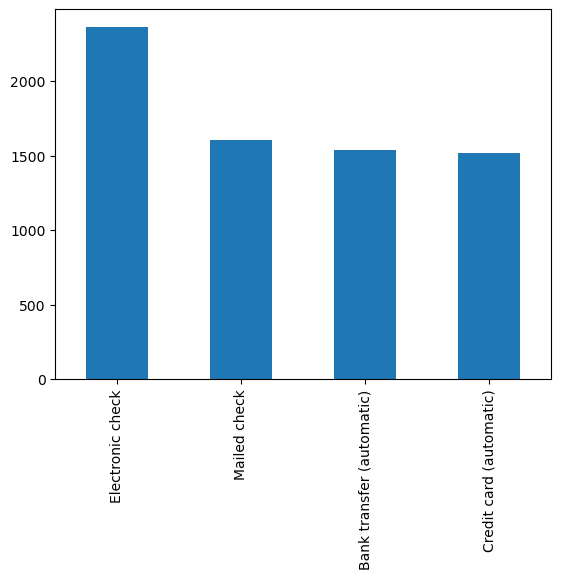

AxesSubplot(0.125,0.11;0.775x0.77) None


In [56]:
uni_variate(df,"PaymentMethod")

`Analysis on "Churn" feature - Categorical`

Feature = Churn
mode: 0    No
Name: Churn, dtype: object
------------------------------------------------
Value_counts:
 No     5163
Yes    1869
Name: Churn, dtype: int64


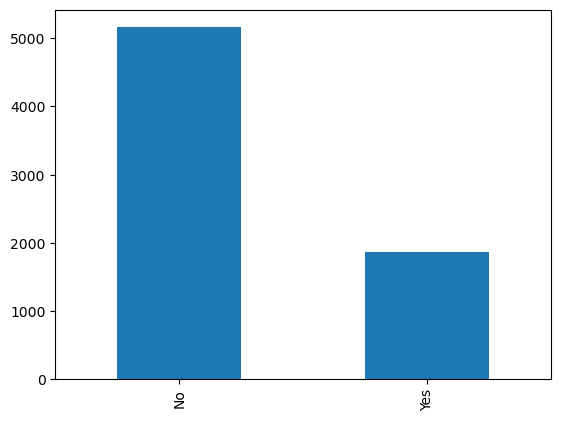

AxesSubplot(0.125,0.11;0.775x0.77) None


In [57]:
uni_variate(df,"Churn")

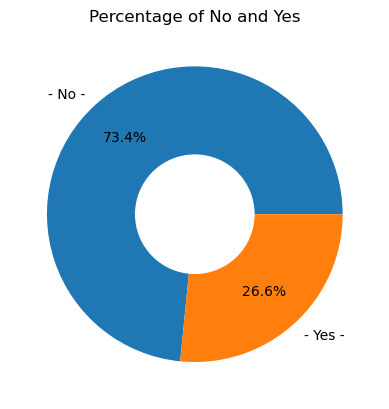

In [58]:
plt.pie(df['Churn'].value_counts(),autopct="%1.1f%%",labels=("- No -","- Yes -"),pctdistance=0.7)
plt.title("Percentage of No and Yes")

my_circle=plt.Circle( (0,0),(0.4) , color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [59]:
# By DoughNut plot we can observe that the people are less likely to churn we can see 26.6% of people are churned to another network 
# And 73.4 % of people are likely to use same network

# Bivariate Analysis

`Analysis on Cat vs Num`

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

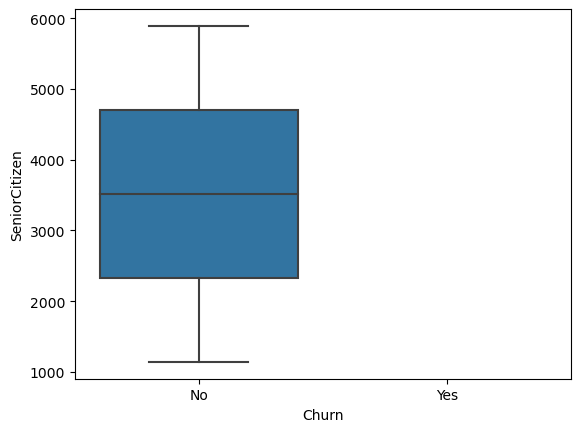

In [60]:
sns.boxplot(x=df["Churn"],y=df["SeniorCitizen"].value_counts())

`Analysis on Cat vs Num`

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

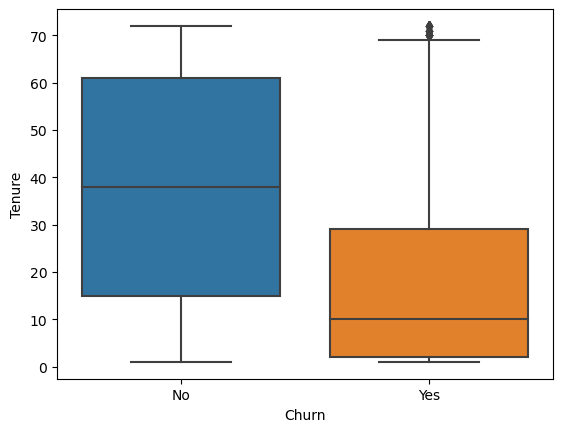

In [61]:
sns.boxplot(x=df["Churn"],y=df["Tenure"])

`Analysis on Cat vs Num`

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

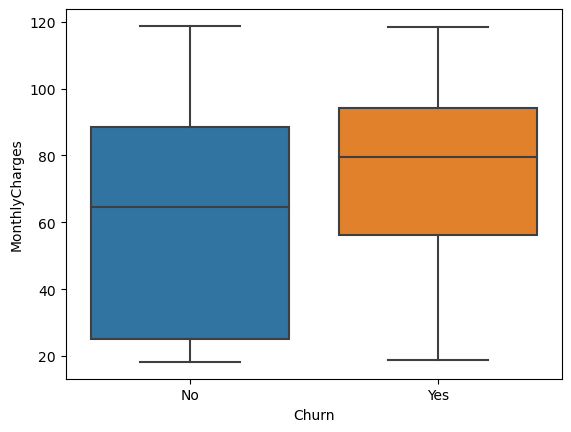

In [62]:
sns.boxplot(x=df["Churn"],y=df["MonthlyCharges"])

`Analysis on Cat vs Num`

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

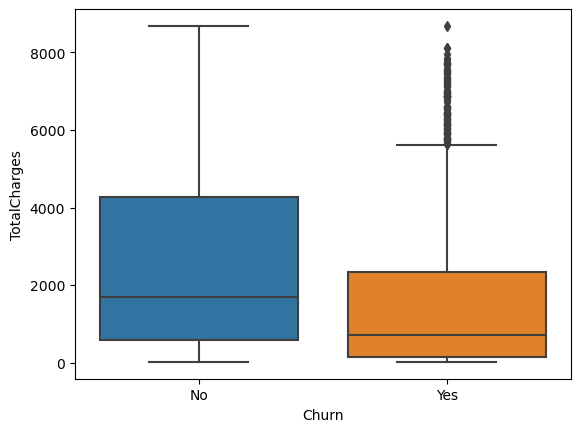

In [63]:
sns.boxplot(x=df["Churn"],y=df["TotalCharges"])

`Analysis on Cat vs Cat`

<AxesSubplot:xlabel='Gender', ylabel='count'>

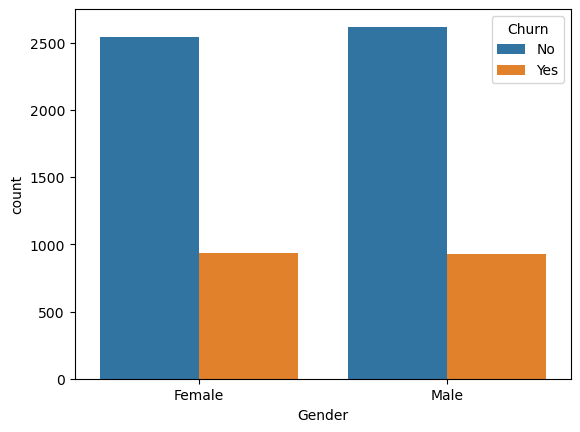

In [64]:
sns.countplot(x="Gender",hue="Churn",data=df)

In [65]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
list_cat=['Gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [67]:
for i in enumerate(list_cat):
    print(i)

(0, 'Gender')
(1, 'SeniorCitizen')
(2, 'Partner')
(3, 'Dependents')
(4, 'PhoneService')
(5, 'MultipleLines')
(6, 'InternetService')
(7, 'OnlineSecurity')
(8, 'OnlineBackup')
(9, 'DeviceProtection')
(10, 'TechSupport')
(11, 'StreamingTV')
(12, 'StreamingMovies')
(13, 'Contract')
(14, 'PaperlessBilling')
(15, 'PaymentMethod')


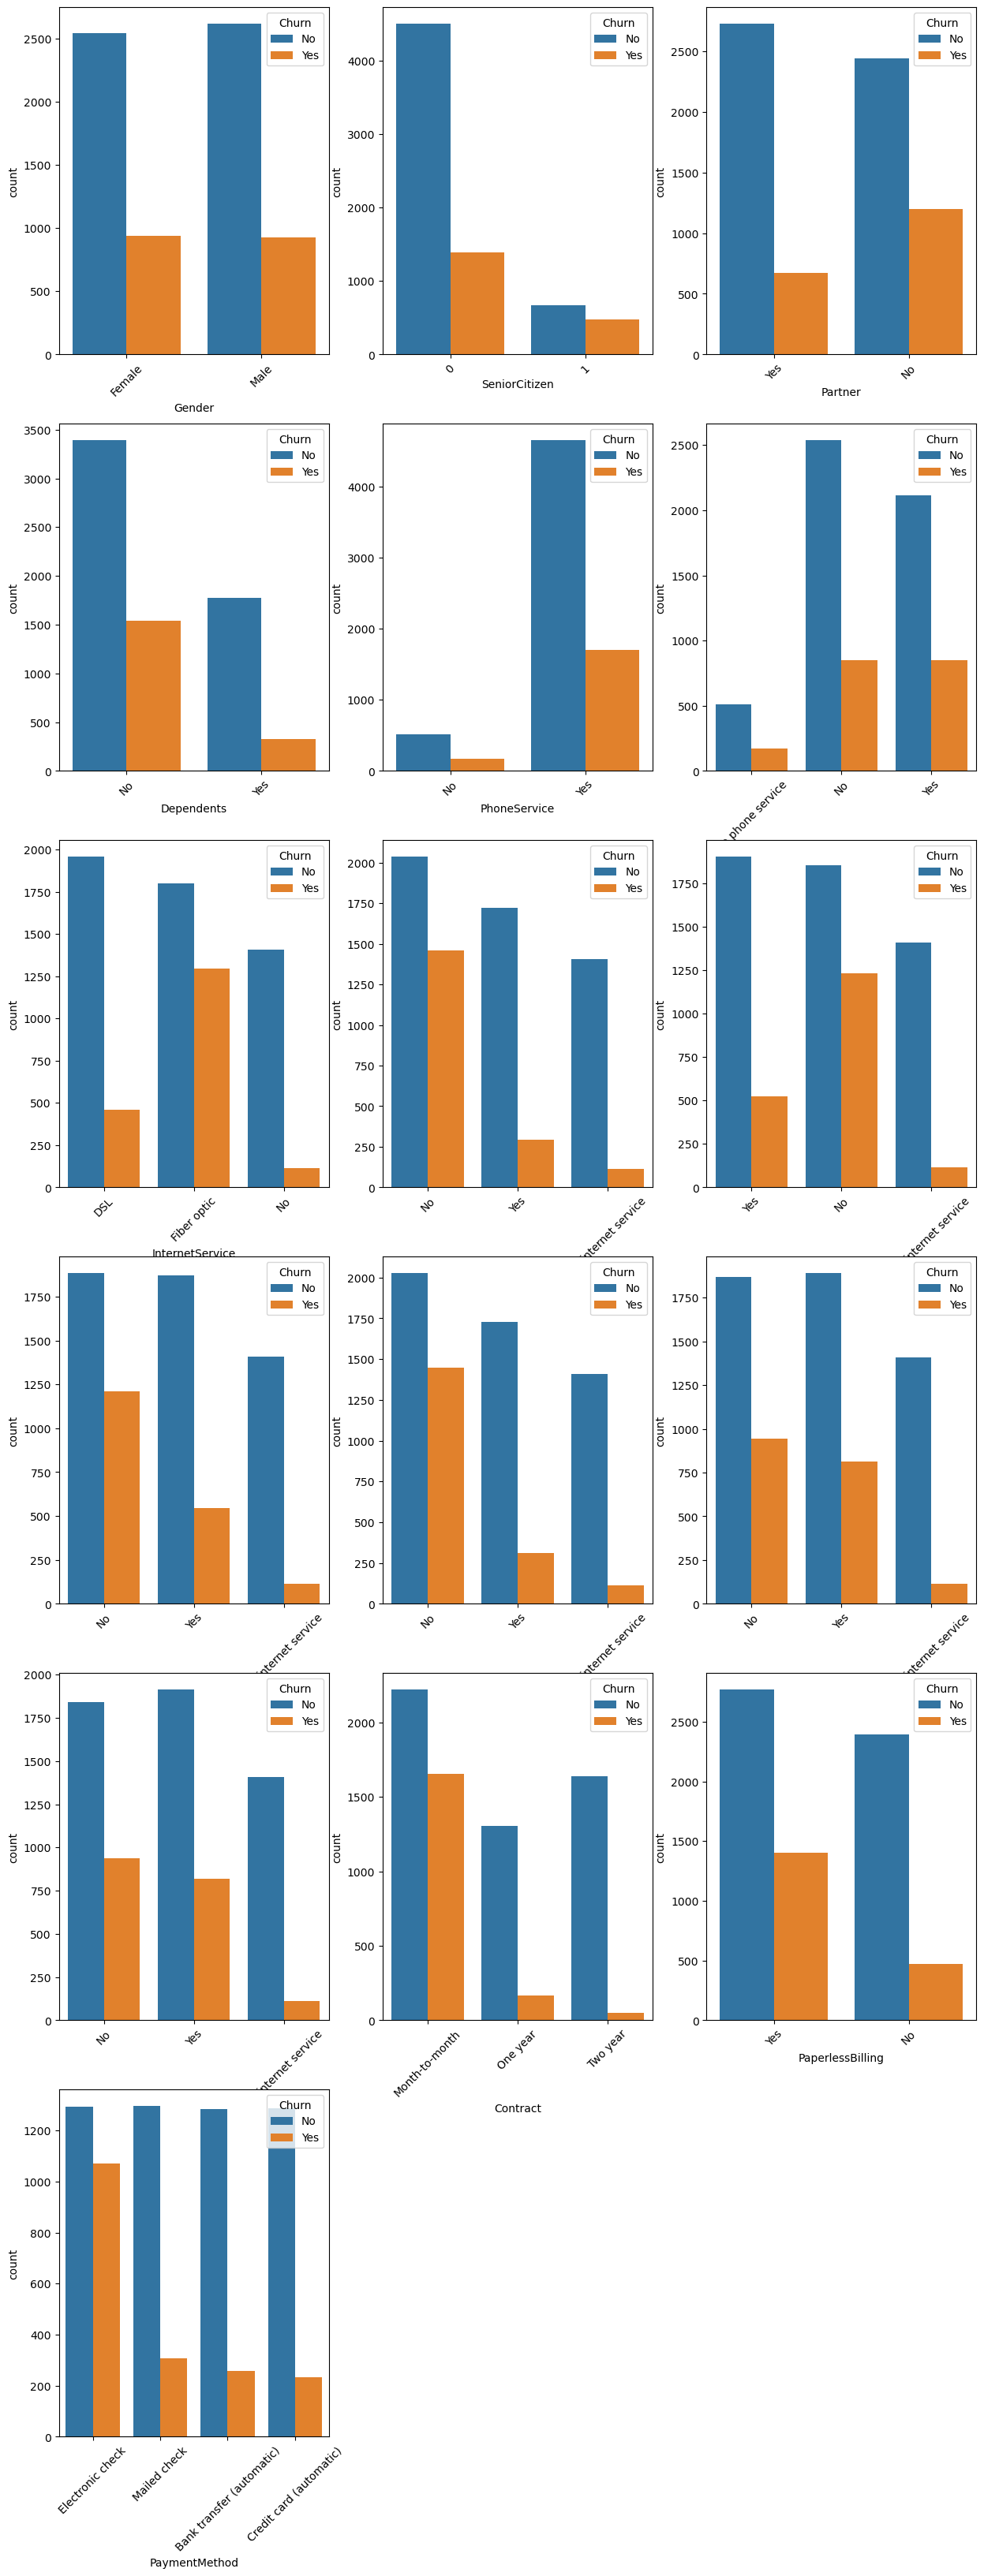

In [68]:
plt.figure(figsize=(15,40))
for i in enumerate(list_cat):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1],hue="Churn",data=df)
    plt.xticks(rotation=45)

In [70]:
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}

def boxplot(x,y,df):
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    for i , j in enumerate (y):
        plt.subplot(plots[len(y)][i])
        ax=sns.boxplot(x=x,y=j,data=df[[x,j]],palette="Blues",linewidth=1)
        
    return plt.show()

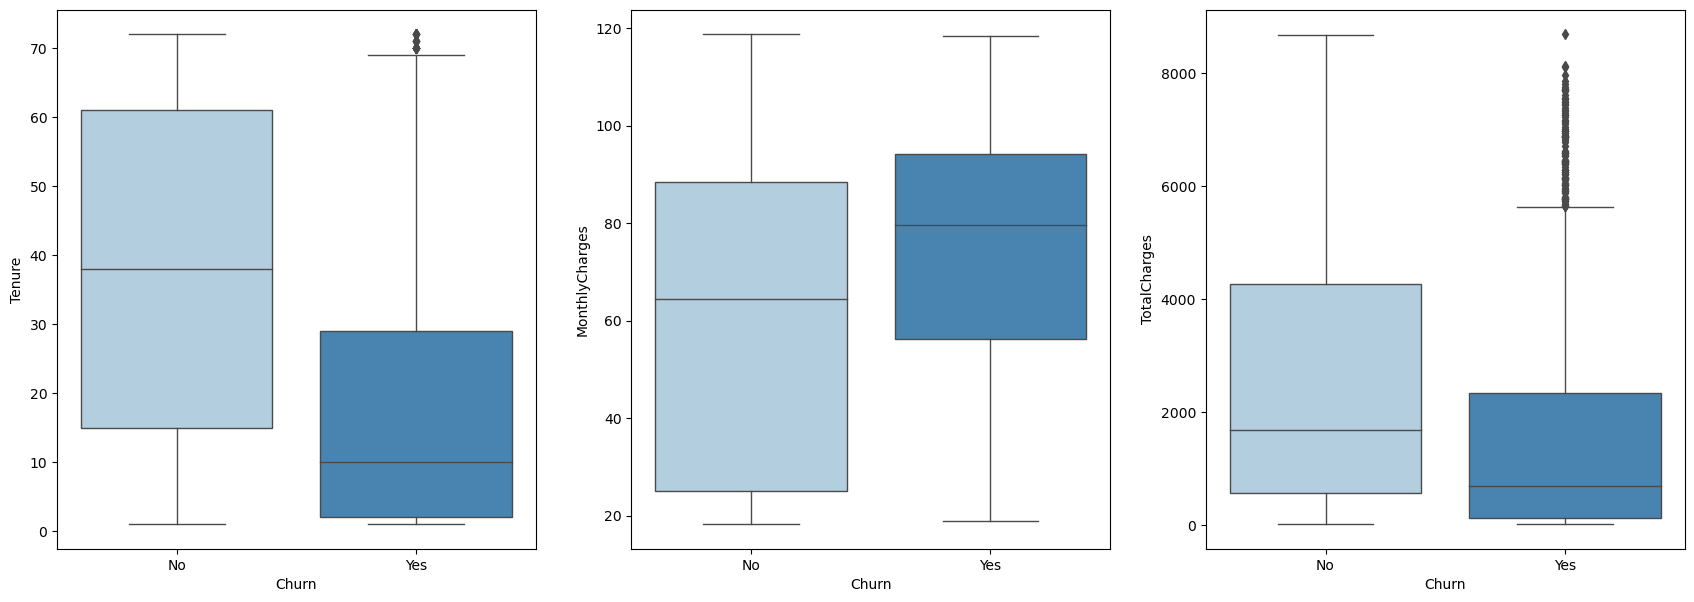

In [71]:
boxplot("Churn",["Tenure","MonthlyCharges","TotalCharges"],df)

In [69]:
# As per the above analysis on each column with the "churn" we can conlude that:
#1. Month to month "contract" are more likely to churn as compared to the one and two year contract.
#2. The one who are going for "paperless billing" are more likely to churn as compared to who dont prefer paperless billing
#3. The one who have "Dependents" are less likely to churn as compared to the one who don't have dependents.
#4. The one who have "Tech-support" and "online-security" are less likely to churn as compared to the one who don't prefer
#   tech-support and "online-security".
#5. The one who have "online-backup" and "Device Protection" are less likely to churn as compared to the one who don't have both.
#6. The one who are paying through electronic check are more likely to churn as compared to other payment methods which are 
#    in auto deduction mode of payment

`Recommendations: -
-->As per the above Observations we can conclude that most of the customers are churned because of the charges,lack of Tech support ,onlineSecurity , and the dependents for the packages which they are using.
-->So inorder to Bring back the customers we can provide the better Tech support , online security, onlinebackups,device protection with better Rates and with some discounts, and welcome back gift coupons so that we could get back the customer base.
--> Payement mode should also be automated as people are more less likely to churn in automated payment methods.
--> To attract the new customers we can keep some joining Benefits to them like free device protections,welcome coupons, and onlinebackups for new customers.
--> We can ask the Referrals to the Best existing customers , by providing the referral bonus for them or increase their duration of existing plans. As asking for the Referrals is the best way to capture more business as compared to the other modes of searching the new customers`